In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [4]:
Xtr.shape

(60000, 28, 28)

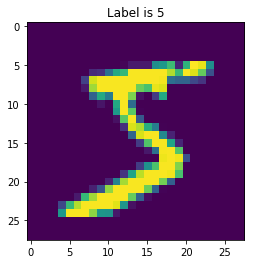

In [5]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


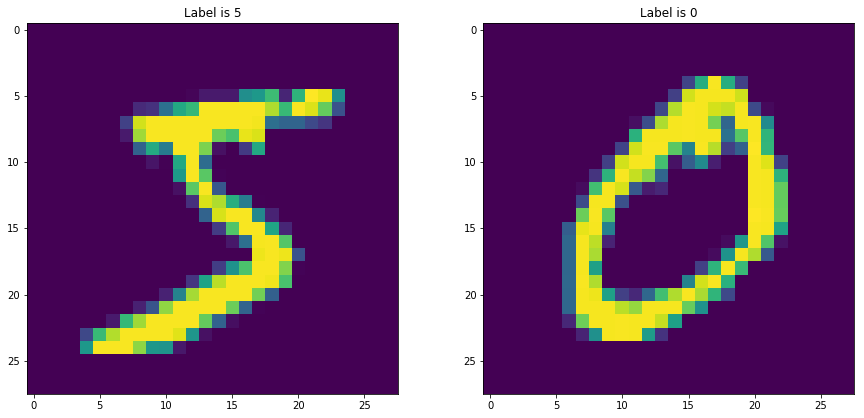

In [6]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [7]:
28*28

784

In [8]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])
Tr_set.shape

(500, 784)

In [9]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)

    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [10]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.2649


In [14]:
np.random.seed(254)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)

A = np.array([a1, a2]).T

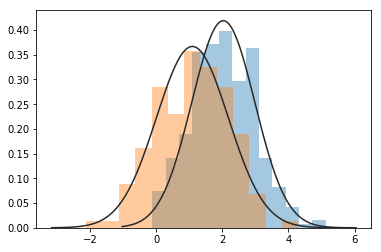

In [26]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(A[:, 0], fit=norm, kde=False)
sns.distplot(A[:, 1], fit=norm, kde=False)

plt.show()
plt.close()

In [27]:
def plotDataCov(data):
    cov_matrix = np.cov(data, rowvar=False, bias=False)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
    ax0 = plt.subplot(2,2,1)
    sns.heatmap(cov_matrix, cmap="GnBu", vmin=0)
    
    ax1 = plt.subplot(2,2,2)
    ax1.scatter(data[:, 0], data[:,1], s=40)

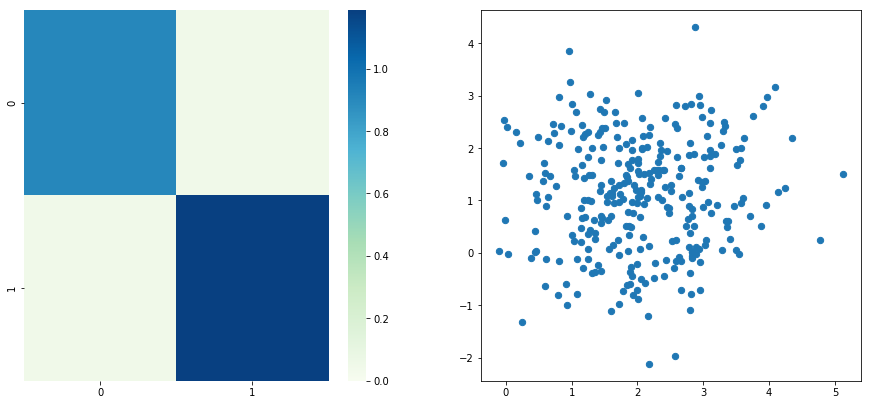

In [30]:
plotDataCov(A)
plt.show()
plt.close()

In [33]:
np.random.seed(254)
a1_cor = np.random.normal(3, 1, 300)
a2_cor = a1_cor+np.random.normal(2, 1, 300)/2

B = np.array([a1_cor, a2_cor]).T

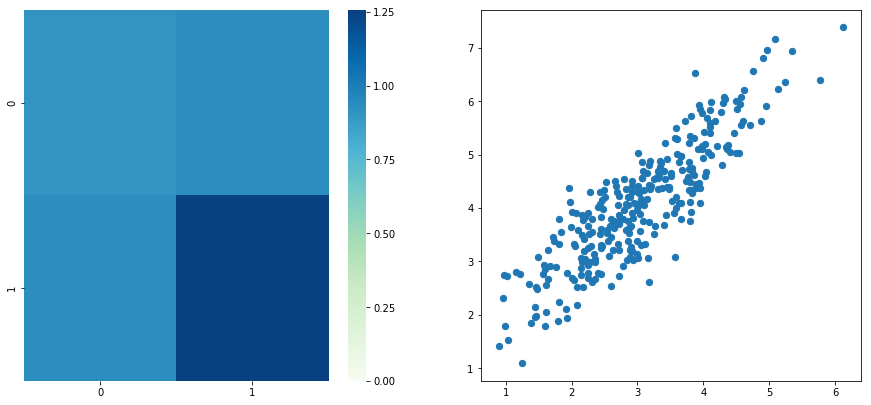

In [34]:
plotDataCov(B)
plt.show()
plt.close()

In [35]:
def center(X):
    newX = X-np.mean(X, axis=0)
    return newX

In [39]:
def standardize(X):
    newX = center(X)/np.std(X, axis=0)
    return newX